In [32]:
import pandas as pd
import autograd.numpy as np
import autograd
import matplotlib.pyplot as plt
import matplotlib
import functools
# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

## Problem 1
Spring Model:
## $\frac{d^2z}{dt^2} + C\frac{dz}{dt} + Kz =0$ 
## $z(0)=2,\ \frac{dz}{dt}(0)=-C $

Forward finite difference: $f'(x) = \frac{f(x+h)-f(x)}{h}$

In [33]:
def analytic_sol(C, K, t):
    return 2*np.exp(-C*t/2)*np.cos(t*np.sqrt(4*K+0j - C**2+0j)/2)

def dz_dC(C, K, t):
#     analytical solution for dz/dC  
    return (C*t*np.exp(-C*t/2)*np.sin(t/2*np.sqrt(4*K+0j - C**2+0j))) / np.sqrt(4*K-C**2) - t*np.exp(-C*t/2)*np.cos(t/2*np.sqrt(4*K+0j - C**2+0j))


def dz_dK(C, K, t):
#     analytical solution for dz/dK  
    return (-2*t*np.sin(t/2*np.sqrt(4*K+0j - C**2+0j))*np.exp(-C*t/2)) / np.sqrt(4*K+0j - C**2+0j)

def fd_dz_dC(C, K, t, delta):
    # forward difference dz/dC
    z_plus_c = 2*np.exp(-(C+delta)*t/2)*np.cos(t*np.sqrt(4*K+0j - (C+delta)**2+0j)/2)
    z = analytic_sol(C, K, t)
    delta_z = (z_plus_c - z)/delta 
    return delta_z

def fd_dz_dK(C, K, t, delta):
    # forward difference dz/dC
    z_plus_K = 2*np.exp(-C*t/2)*np.cos(t*np.sqrt(4*(K+delta)+0j - C**2+0j)/2)
    z = analytic_sol(C, K, t)
    delta_z = (z_plus_K - z)/delta 
    return delta_z

def cs_dz_dC(C, K, t, delta):
    # complex step difference dz/dC
    z_plus_c = np.imag(2*np.exp(-(C+1j*delta)*t/2)*np.cos(t*np.sqrt(4*K+0j - (C+1j*delta)**2+0j)/2))
    delta_z = z_plus_c/delta 
    return delta_z

def cs_dz_dK(C, K, t, delta):
    # complex step difference dz/dK
    z_plus_K = np.imag(2*np.exp(-C*t/2)*np.cos(t*np.sqrt(4*(K+1j*delta) - C**2+0j)/2))
    delta_z = z_plus_K/delta 
    return delta_z

In [34]:
stepsize = 10e-6
t_array = np.linspace(0,100,1001)
C_array = np.arange(0,100, 1001)

nominal_C=0.2
nominal_K=3

c_sens = np.real(dz_dC(nominal_C, nominal_K, t_array))
k_sens = np.real(dz_dK(nominal_C, nominal_K, t_array))

c_sens_fd = np.real(fd_dz_dC(nominal_C, nominal_K, t_array, stepsize))
k_sens_fd = np.real(fd_dz_dK(nominal_C, nominal_K, t_array, stepsize))

c_sens_cs = cs_dz_dC(nominal_C, nominal_K, t_array, stepsize)
k_sens_cs = cs_dz_dK(nominal_C, nominal_K, t_array, stepsize)

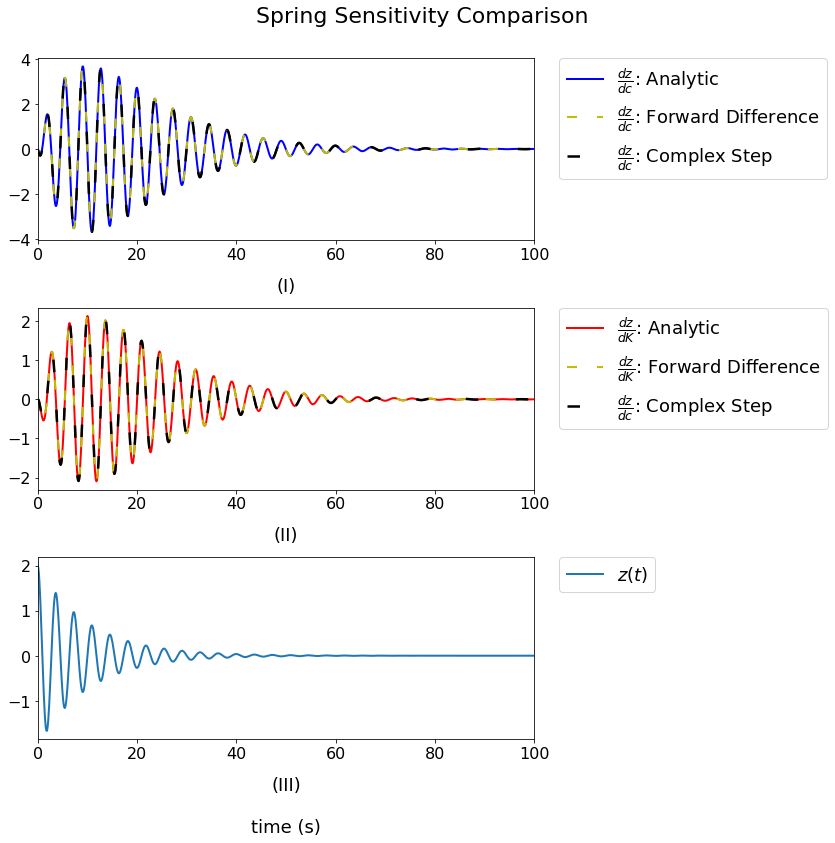

In [70]:
# plots
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12, 12))

axes[0].plot(t_array, c_sens, label=r'$\frac{dz}{dc}$: Analytic', c='b', linewidth=2)
axes[0].plot(t_array, c_sens_fd, label=r'$\frac{dz}{dc}$: Forward Difference', linestyle ='--',dashes=(5, 10), c='y', linewidth=2)
axes[0].plot(t_array, c_sens_cs, label=r'$\frac{dz}{dc}$: Complex Step', linestyle =':',dashes=(5, 15), c='k', linewidth=2.5)
axes[0].set_xlim(0, 100);
axes[0].set_xlabel('(I)', labelpad=15)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

axes[1].plot(t_array, k_sens, label=r'$\frac{dz}{dK}$: Analytic',c='r', linewidth=2)
axes[1].plot(t_array, k_sens_fd, label=r'$\frac{dz}{dK}$: Forward Difference', linestyle='--',dashes=(5, 10), c='y', linewidth=2)
axes[1].plot(t_array, k_sens_cs, label=r'$\frac{dz}{dc}$: Complex Step', linestyle =':',dashes=(5, 15), c='k', linewidth=2.5)
axes[1].set_xlim(0, 100);
axes[1].set_xlabel('(II)', labelpad=15)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

axes[2].plot(t_array,np.real(analytic_sol(nominal_C, nominal_K,t_array)), label=r'$z(t)$', linewidth=2)
axes[2].set_xlim(0, 100);
axes[2].set_xlabel('(III)\n\n' + 'time (s)', labelpad=15)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


plt.suptitle('Spring Sensitivity Comparison');
plt.tight_layout();
fig.subplots_adjust(top=0.92)
plt.savefig('Spring_Sensitivity_Comparison.png')

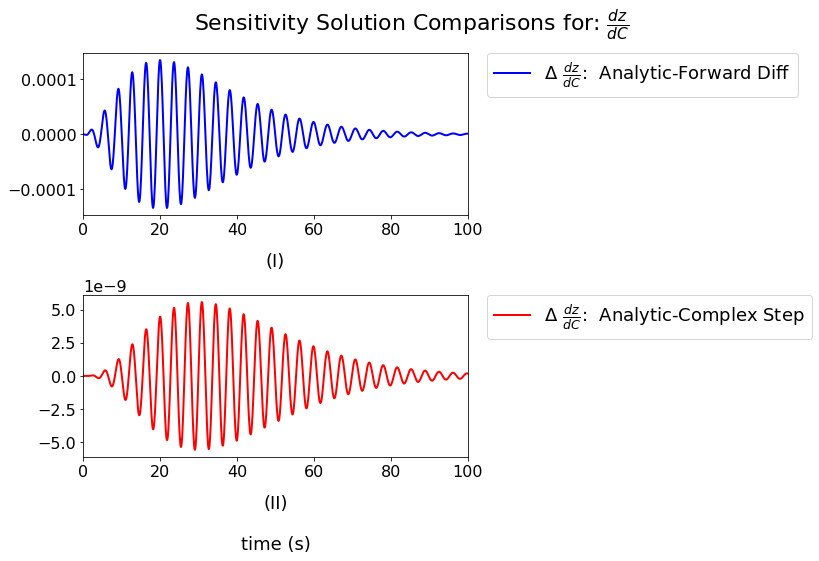

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12, 8))
axes[0].plot(t_array, c_sens-c_sens_fd, label=r'$\Delta \ \frac{dz}{dC}$:  Analytic-Forward Diff' , c='b',linewidth=2)
axes[0].set_xlim(0, 100);
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
axes[0].set_xlabel('(I)', labelpad=15)


axes[1].plot(t_array, c_sens-c_sens_cs, label=r'$\Delta \ \frac{dz}{dC}$:  Analytic-Complex Step', c='r',linewidth=2)
axes[1].set_xlim(0, 100);
axes[1].set_xlabel('(II)\n\n' + 'time (s)', labelpad=15)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


plt.suptitle(r'Sensitivity Solution Comparisons for: $\frac{dz}{dC}$');
plt.tight_layout();
fig.subplots_adjust(top=0.90)
plt.savefig('Solution_comparison_dzdC.png')

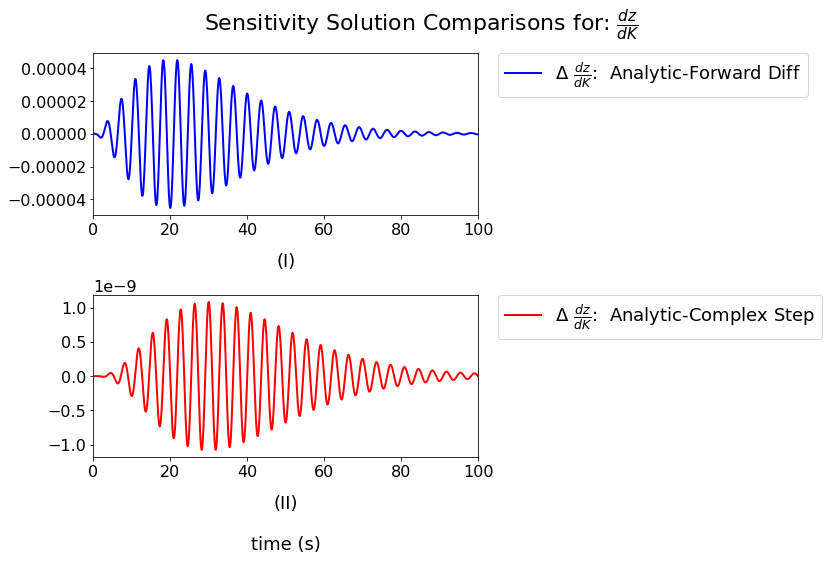

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12, 8))
axes[0].plot(t_array, k_sens-k_sens_fd, label=r'$\Delta \ \frac{dz}{dK}$:  Analytic-Forward Diff' , c='b',linewidth=2)
axes[0].set_xlim(0, 100);
axes[0].set_xlabel('(I)', labelpad=15)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


axes[1].plot(t_array, k_sens-k_sens_cs, label=r'$\Delta \ \frac{dz}{dK}$:  Analytic-Complex Step', c='r',linewidth=2)
axes[1].set_xlim(0, 100);
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
axes[1].set_xlabel('(II)\n\n' + 'time (s)', labelpad=15)


plt.suptitle(r'Sensitivity Solution Comparisons for: $\frac{dz}{dK}$');
plt.tight_layout();
fig.subplots_adjust(top=0.90)
plt.savefig('Solution_comparison_dzdK.png')

### Problem 2 

In [38]:
def steady_heat(x,T_ambient, a,b,L, Phi, h, k):
    def gamma_func(a, b, k):
        return np.sqrt( (2*(a+b)*h) / (a*b*k))
    
    def c1_func(L, g, Phi, h, k):
        # g = gamma
        return - Phi/(k*g) * ((np.exp(g)**L)*(h + k*g)) * ((np.exp(-g)**L)*(h-k*g)+(np.exp(g)**L)*(h+k*g))**(-1)
    
    def c2_func(Phi, k, g, c_1):
        return Phi/(k*g) + c_1
       
    gamma = gamma_func(a,b, k)
    c1 = c1_func(L, gamma, Phi, h, k)
    c2 = c2_func(Phi, k, gamma, c1)
    
    return c1*np.exp(-gamma * x) + c2*np.exp(gamma*x) + T_ambient

def finite_diff_param(y,step, p_package, variable):
    for key, values in p_package.items():
        if variable == key:
            p_package_step = p_package.copy()
            p_package_step[key] = values + step
    return (y(*p_package_step.values()) - y(*p_package.values())) / step


In [39]:
Phi, h, k = -18.4, 0.00191, 2.37
step = 1e-4
T_amb = 21.29
a = 0.96
b = a
L = 70

x_domain = np.arange(10, 70, 4)
x_domain


fd_package = {"x":x_domain, "ambient temp": T_amb, 'a':a, "b":b, "L": L, "Phi": Phi, 'h':h, 'k': k, }
y_solution = steady_heat(*fd_package.values())

dy_dPhi = finite_diff_param(steady_heat, step, fd_package, 'Phi')
dy_dh = finite_diff_param(steady_heat, step, fd_package, 'h')
dy_dk = finite_diff_param(steady_heat, step, fd_package, 'k')

dy_dPhi_auto = autograd.grad(steady_heat, 5) # take heat function, differentiate with respect to variable 5, returns a new function that is dy /dPhi
dy_dPhi_auto_values = [dy_dPhi_auto(x, T_amb, a, b, L, Phi, h, k) for x in x_domain] # evaluate new function at points and pass extra parameters

dy_dh_auto = autograd.grad(steady_heat, 6)
dy_dh_auto_values = [dy_dh_auto(x, T_amb, a, b, L, Phi, h, k) for x in x_domain]

dy_dk_auto = autograd.grad(steady_heat, 7)
dy_dk_auto_values = [dy_dk_auto(x, T_amb, a, b, L, Phi, h, k) for x in x_domain]


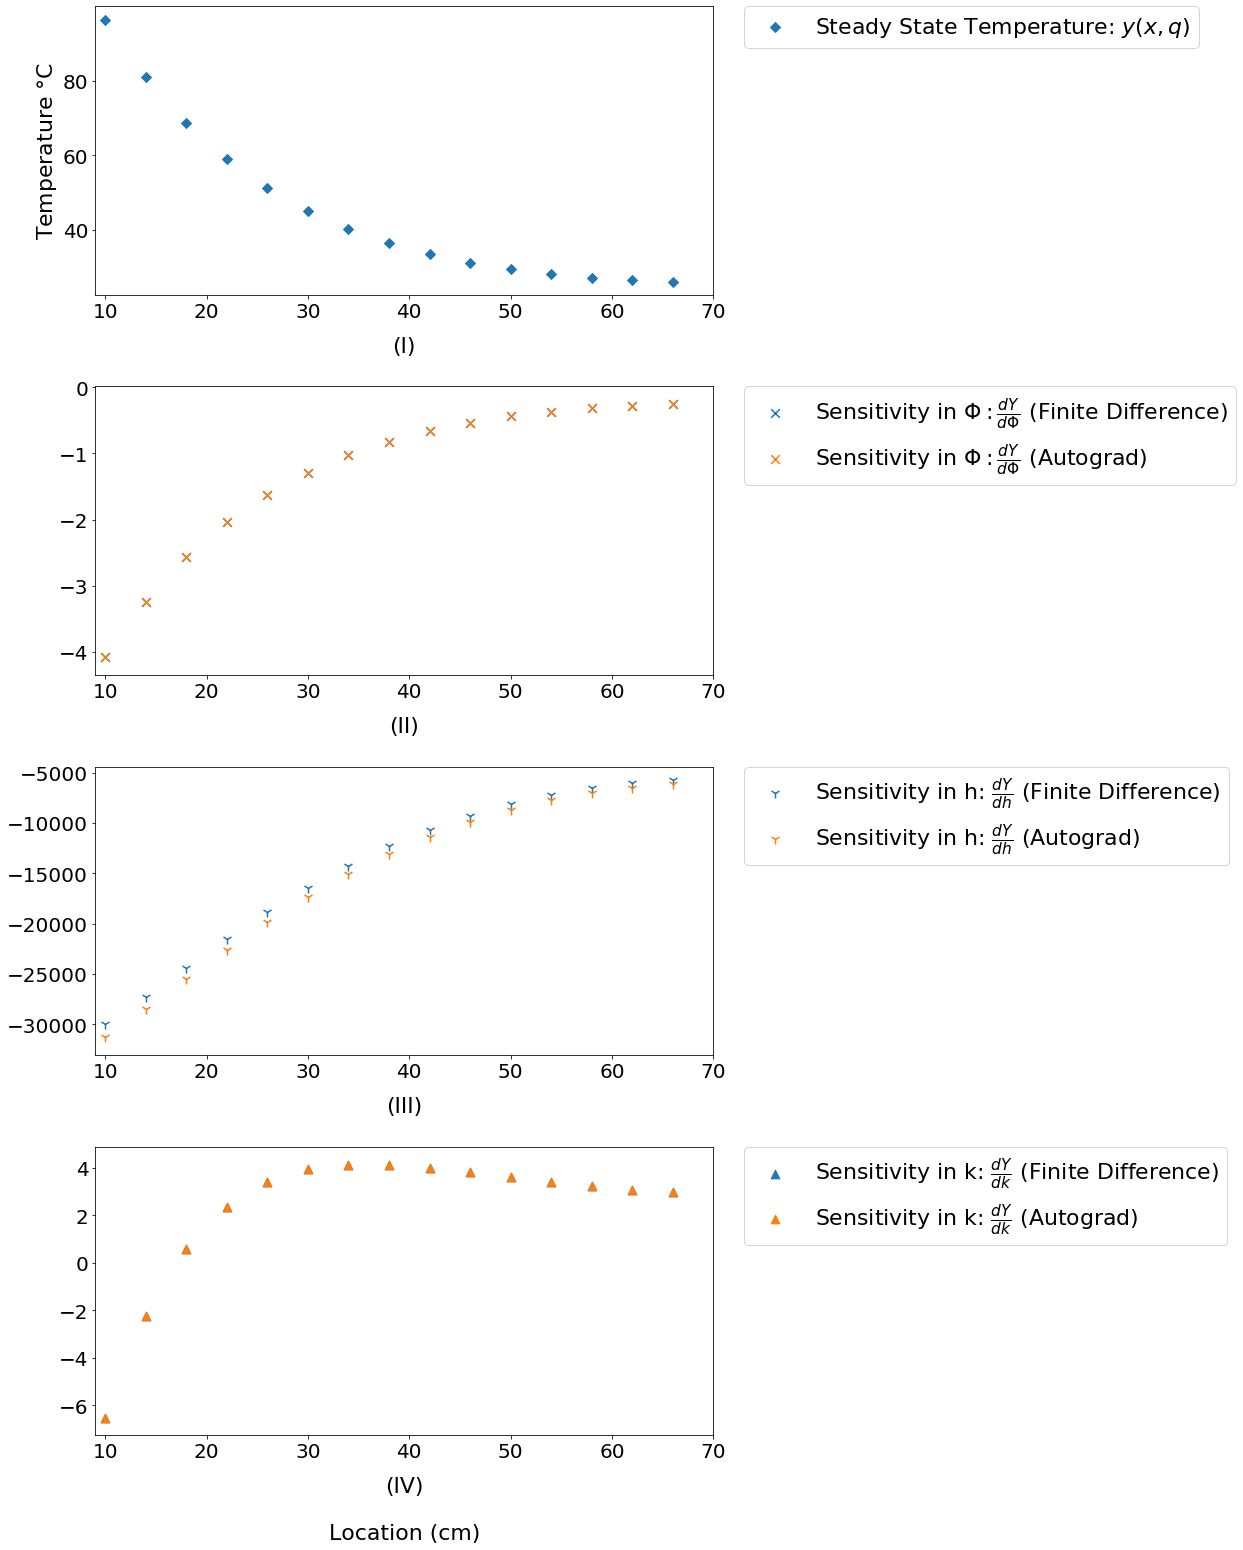

In [82]:
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(18, 22))

axes[0].scatter(x_domain, y_solution, s=50, marker="D", label=r'Steady State Temperature: $y(x,q)$')
axes[0].set_xlim(9, 70);
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
axes[0].set_ylabel('Temperature $\degree$C')
axes[0].set_xlabel('(I)', labelpad=15)

axes[1].scatter(x_domain, dy_dPhi,s=75, marker="x", label=r'Sensitivity in $\Phi: \frac{dY}{d\Phi}$ (Finite Difference)')
axes[1].scatter(x_domain, dy_dPhi_auto_values,s=75, marker="x", label=r'Sensitivity in $\Phi: \frac{dY}{d\Phi}$ (Autograd)')
axes[1].set_xlim(9, 70);
axes[1].set_xlabel('(II)', labelpad=15)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

axes[2].scatter(x_domain, dy_dh,s=100, marker="1", label=r'Sensitivity in h: $\frac{dY}{dh}$ (Finite Difference)')
axes[2].scatter(x_domain, dy_dh_auto_values,s=100, marker="1", label=r'Sensitivity in h: $\frac{dY}{dh}$ (Autograd)')
axes[2].set_xlim(9, 70);
axes[2].set_xlabel('(III)', labelpad=15)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

axes[3].scatter(x_domain, dy_dk,s=75, marker="^",  label=r'Sensitivity in k: $\frac{dY}{dk}$ (Finite Difference)')
axes[3].scatter(x_domain, dy_dk_auto_values,s=75, marker="^", label=r'Sensitivity in k: $\frac{dY}{dk}$ (Autograd)')
axes[3].set_xlim(9, 70);
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.xlabel('(IV)\n\n'+'Location (cm)', labelpad=15);
# fig.subplots_adjust(right=0.5)
plt.tight_layout()
plt.savefig('problem2_a.png')


In [88]:
a,b,c = np.asarray(dy_dPhi_auto_values), np.asarray(dy_dh_auto_values),  np.asarray(dy_dk_auto_values)
Chi_matrix = np.stack((a,b,c), axis=1)
print("Chi Size: " ,Chi_matrix.shape)
W = np.transpose(Chi_matrix)@Chi_matrix  # fancy new matrix multiplication symbol
rank = np.linalg.matrix_rank(W)
print(f'Rank of Matrix with Phi, h, and k: {rank}')
# U, s, V = np.linalg.svd(W)
# print(s)

eigens, norm_eigen_vectors = np.linalg.eig(W)
idx = np.argsort(eigens)

ordered_eigens = eigens[idx][::-1]
ordered_norm_eigen_vectors = norm_eigen_vectors[:,idx][:,::-1]
# print(ordered_eigens,'\n' ,ordered_norm_eigen_vectors)
# max(ordered_norm_eigen_vectors[:,-1])
print( 'Ordered Eigen vectors: \n',ordered_norm_eigen_vectors)

find_index = np.argwhere(ordered_norm_eigen_vectors[:, -1] == max(ordered_norm_eigen_vectors[:,-1]))[0][0]
human_index = find_index + 1
print(f"Parameter {human_index} is not identifiable")


rank_2_params = np.linalg.matrix_rank(np.transpose(np.stack((a,b), axis=1))@np.stack((a,b), axis=1))
print(f'Rank of Reduced Matrix without parameter k: {rank_2_params}')

Chi Size:  (15, 3)
Rank of Matrix with Phi, h, and k: 2
Ordered Eigen vectors: 
 [[ 9.65450590e-05 -1.27748998e-01 -9.91806526e-01]
 [ 9.99999994e-01 -4.35637204e-05  1.02953830e-04]
 [-5.63590307e-05 -9.91806529e-01  1.27748993e-01]]
Parameter 3 is not identifiable
Rank of Reduced Matrix without parameter k: 2
